## Topics year distribution

The first task is to find the documents year distribution for each topic. Each date is considered in a five year interval and each interval is normalized by the total number of documents in the interval.

In [1]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint

from src.dataset import Dataset

In [2]:
topics_dates = Dataset().load_dataset(year=None, fields={"topic", "decision_date"})

In [3]:
def norm(date, interval=5):
    return date - date%interval

# count all frequencies of intervals
all_freqs = defaultdict(lambda:0)
for el in topics_dates:
    d = norm(el['decision_date'])
    all_freqs[d] += 1

# compute topic frequencies normalized by the total of each interval
topic_dists = defaultdict(lambda:defaultdict(lambda:0))
for el in topics_dates:
    d = norm(el['decision_date'])
    t = el["topic"]
    for i, e in enumerate(t):
        topic_dists[i][d] += e/all_freqs[d]    

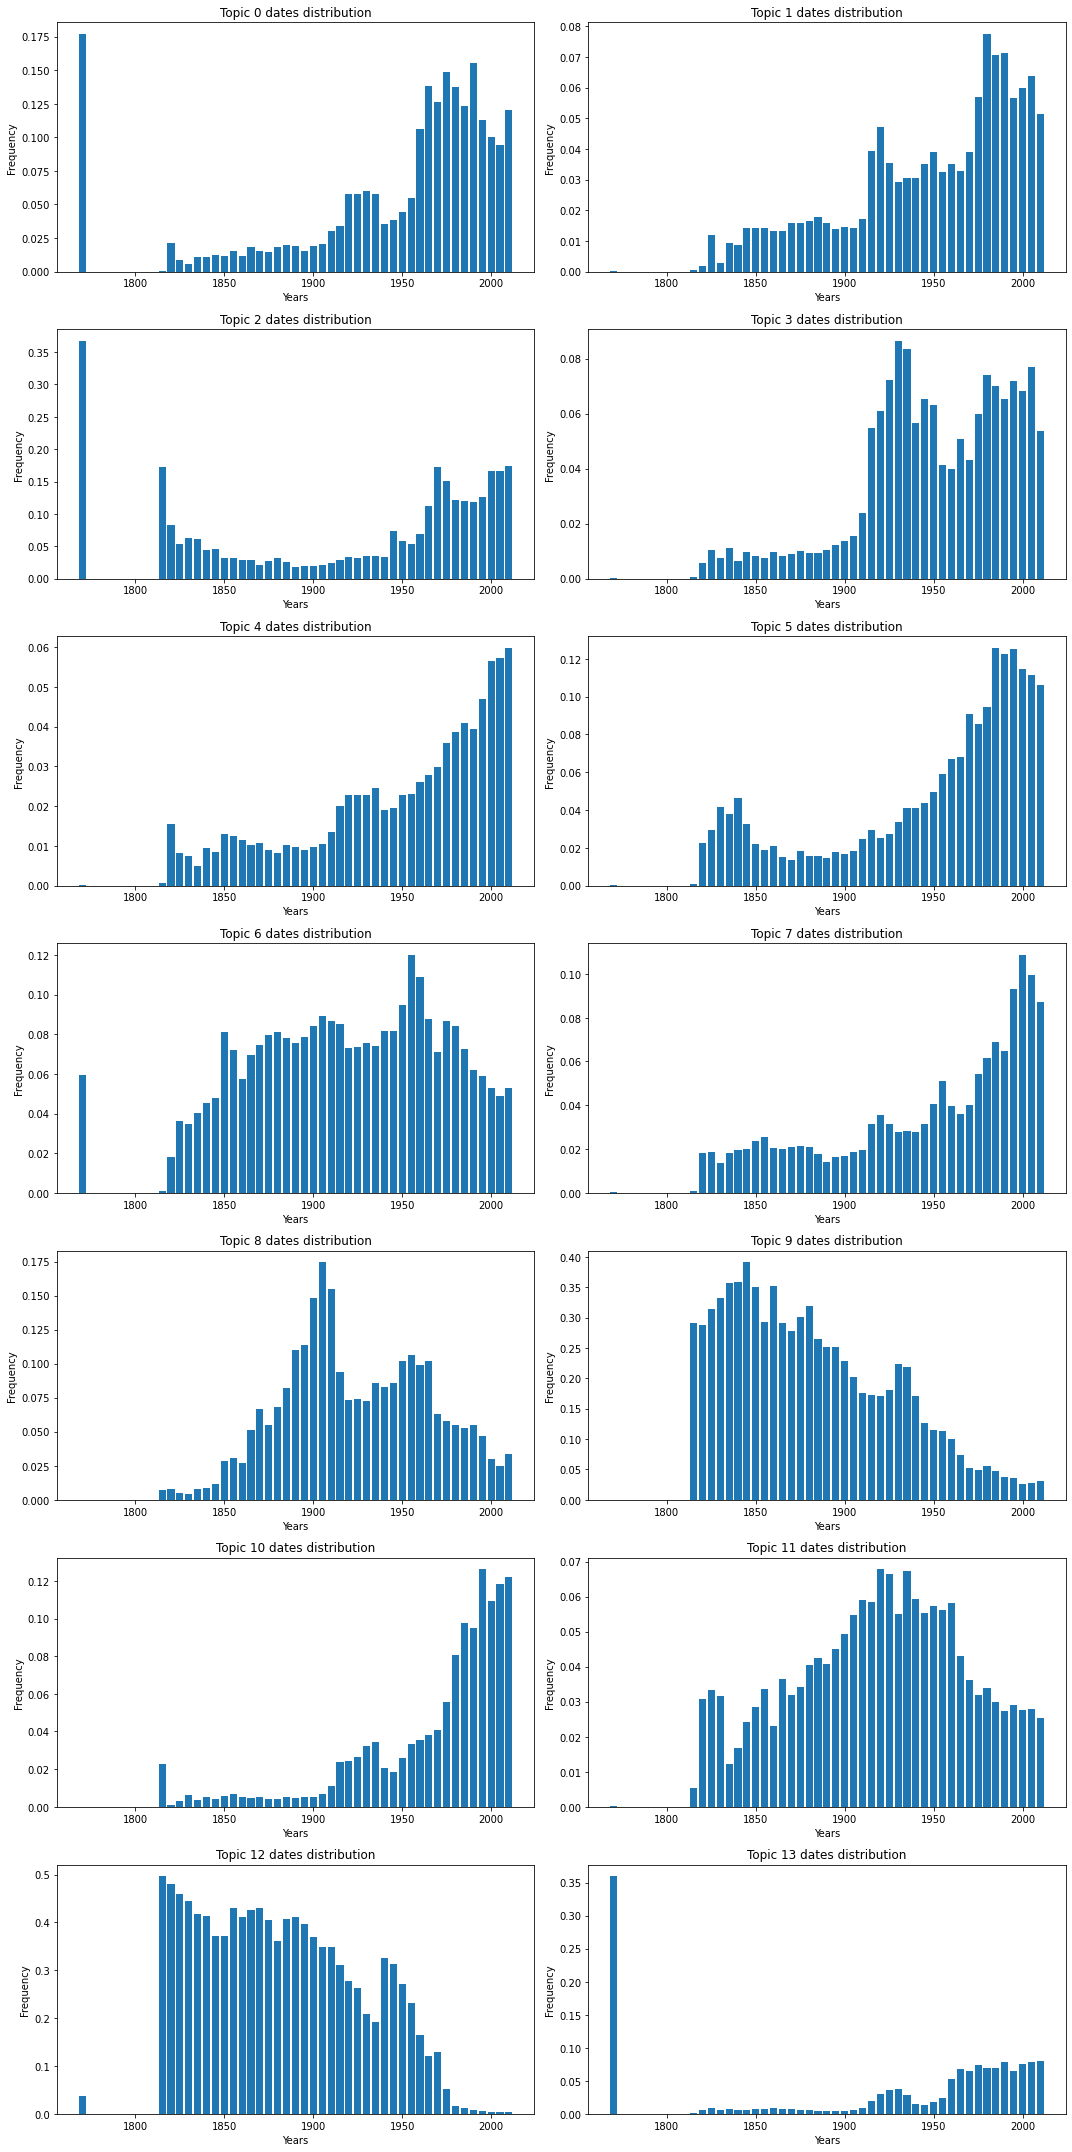

In [5]:
fig, axs = plt.subplots(7,2, figsize=(15,30))

for i in range(14):
    x = topic_dists[i].keys()
    y = topic_dists[i].values()
    axs[i//2][i%2].bar(x, y, width = 4)
    axs[i//2][i%2].set(title=f"Topic {i} dates distribution", xlabel="Years", ylabel="Frequency")
    
plt.tight_layout()
plt.savefig("../data/images/topics_year_distribution.jpeg", dpi=200)
plt.show()

We can see for instance that the topic 13 is more relevant in recent years, while the 9 has a greater impact towards the 1900.

### Courts topics distribution
Next, for each court we compute the topic distribution, those are more or less the same, and the one with the highest cardinality, the Appellate Court, seems to have a good mix of all the topics, thus, it is considered as a good dataset sample, and will be used to compute Word embeddings.

In [ ]:
court_topics = Dataset().load_dataset(year=None, fields={"topic", "court"})

In [ ]:
courts_all_freqs = defaultdict(lambda:0)
for el in court_topics:
    c = el["court"]
    courts_all_freqs[c] += 1

court_freqs = defaultdict(lambda:[0]*14)

for el in court_topics:
    t = el["topic"]
    c = el["court"]
    for i, e in enumerate(t):
        court_freqs[c][i] += e/courts_all_freqs[c]

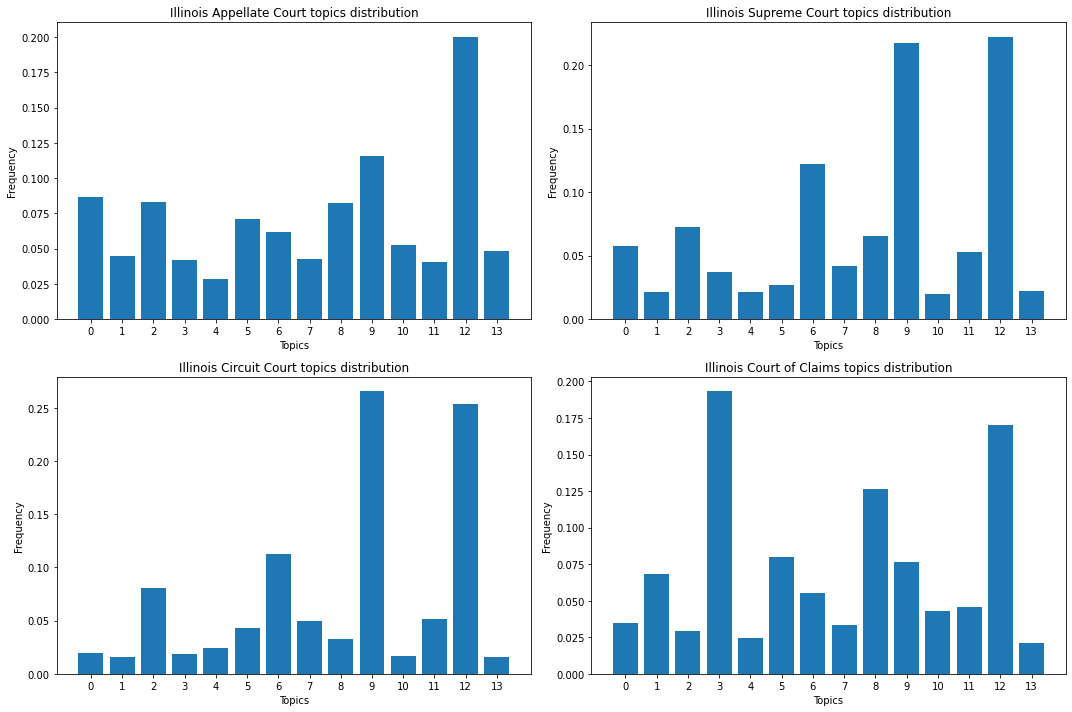

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
x = range(14)
for i, (k, v) in enumerate(court_freqs.items()):
    axs[i//2][i%2].bar(x, v)
    axs[i//2][i%2].set(title=f"{k} topics distribution", xlabel="Topics", ylabel="Frequency", xticks=x)
    
plt.tight_layout()
plt.savefig("../data/images/courts_topics_distribution.jpeg", dpi=200)
plt.show()